**Lab 4**

1.   Image Histogram
2.   Image Correction
3.   Auto Correction




Imports

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from io import BytesIO

##1. Image Histogram
Define calculation and plot histogram function

In [11]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

def read_image_from_bytes(image_bytes):
    # Convert bytes to numpy array
    nparr = np.frombuffer(image_bytes, np.uint8)
    # Decode image
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

Upload file

In [1]:
from google.colab import files
uploaded = files.upload()

Saving demo-image.png to demo-image.png


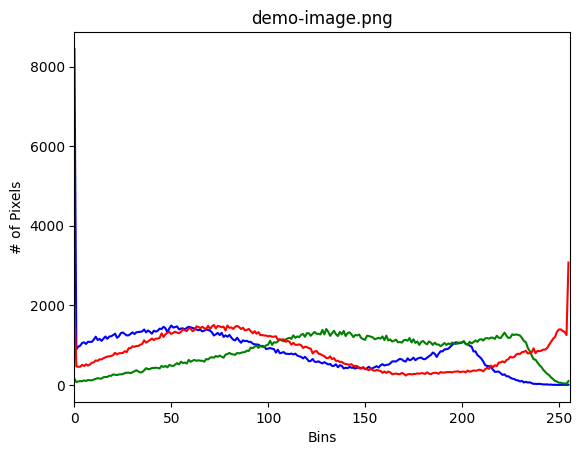

In [13]:
for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])
  plot_histogram(im, img_key)

##2. Image Correction

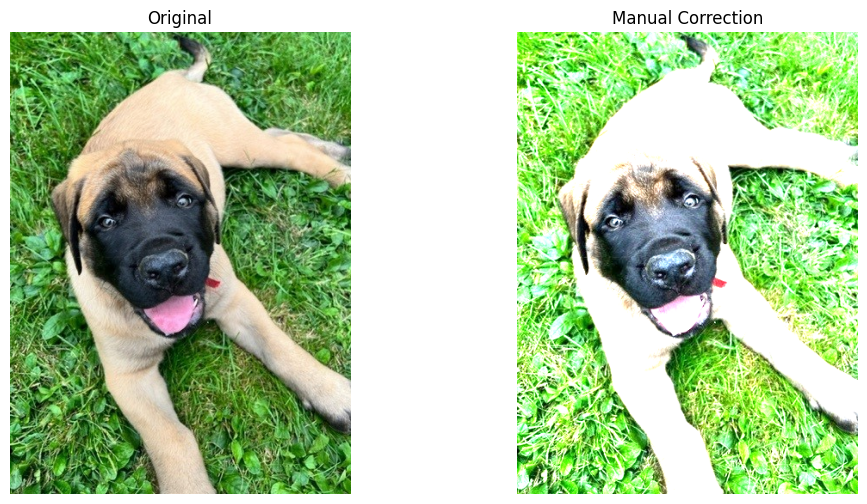

In [21]:
alpha = 1.95 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])

  manual_result = cv2.convertScaleAbs(im, alpha=alpha, beta=beta)

  plt.figure(figsize=(12, 6))

  # Original image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Original")

  # Correction
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(manual_result, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Manual Correction")


##3. Auto Correlation

In [23]:
def auto_correction(image):
    # Convert to YUV color space
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # Apply histogram equalization to the Y channel
    yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])

    # Convert back to BGR color space
    corrected_image = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

    return corrected_image

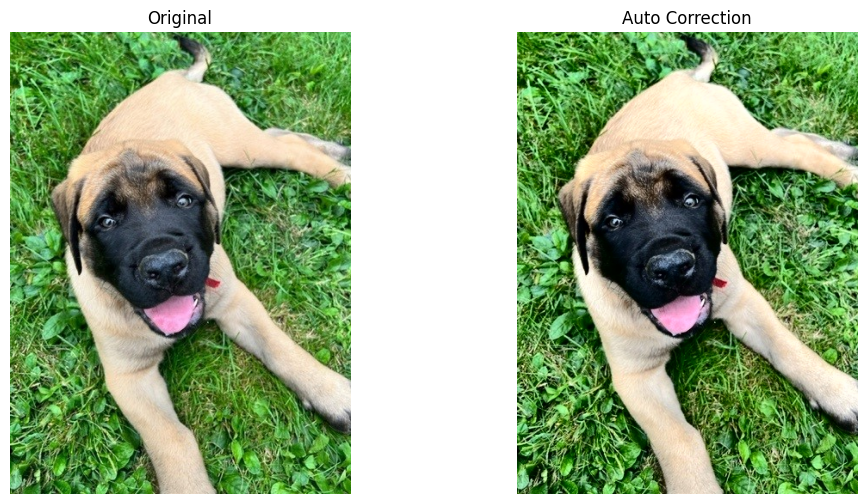

In [24]:
for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])

  corrected_image = auto_correction(im)

  plt.figure(figsize=(12, 6))

  # Original image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Original")

  # Correction
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Auto Correction")